Nama : Faisal Faturohman

Email : faisal.faturohman@gmail.com

Pada Submission ini tantangannya yaitu melakukan klasifikasi gambar dengan dataset rock, paper, scissors. Dataset dibagi menjadi 2 bagian yaitu data train dan validation data dengan ukuran validation set 40% dan train set 60%.

Dataset dari masing-masing gambar dijelaskan oleh pemilik dataset memiliki ukuran 300x200, pada prosesnya akan dilakukan pengimplementasian augmentasi gambar dan menggunakan image data generator, model harus menggunakan model sequential dengan minimal akurasi 85%.

In [ ]:
# Import Library yang digunakan

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import pandas as pd
import numpy as np
from keras.preprocessing import image
import zipfile,os
from google.colab import files
import requests
from io import BytesIO
from PIL import Image

In [ ]:
#Download dataset

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip #penempatan dataset di folder tmp

--2021-02-08 02:23:32--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.62MB/s    in 3m 35s  

2021-02-08 02:27:08 (1.43 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada dataset yang berbentuk file zip

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Menggunakan fungsi listdir untuk melihat direktori yang terdapat pada dataset.

In [ ]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['rock', 'scissors', 'README_rpc-cv-images.txt', 'paper']

karena ada file lain maka perlu dihapus dengan cara dibawah ini:

In [ ]:
!rm -rf /tmp/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt

Lalu coba cek lagi apakah sudah terhapus file yang tidak digunakan tersebut

In [ ]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['rock', 'scissors', 'paper']

Setelah dataset sudah bersih dari file yang tidak perlu, lalu melihat jumlah foto pada setiap folder atau label.

In [ ]:
print('total rock :', len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/rock')))
print('total scissors :', len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/scissors')))
print('total paper :', len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/paper')))

total rock : 726
total scissors : 750
total paper : 712


Pada data diatas dapat dilihat bahwa dataset berjumlah 2188 

## Contoh Dataset

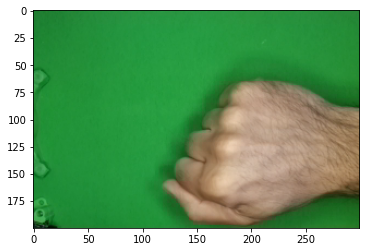

In [ ]:
img = image.load_img('/tmp/rockpaperscissors/rps-cv-images/rock/00nKV8oHuTGi20gq.png')
imgplot = plt.imshow(img)

# **Augmentasi Gambar**

Dengan menggunakan ImageDataGenerator maka akan dilakukan pengaplikasian augmentasi gambar pada dataset. 

In [ ]:
train_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images')
train_datagen = ImageDataGenerator(rescale=1./255, #dilakukan rescaling data agar nilai piksel pada foto menjadi antara 0 sampai 1
    rotation_range=20, #melakukan rotasi gambar secara acak
    zoom_range=0.2, #melakukan zoom pada gambar
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.4) # split dataset dengan validation set 40% dan train set 60%

Dikarenakan dataset masih berbentuk 1 direktori, maka dibuatlah 2 direktori yaitu training dan testing. 

# **Split Dataset**

In [ ]:
train_generator = train_datagen.flow_from_directory( #Membuat direktori train
    train_dir, #merupakan direktori yang akan digunakan
    target_size=(150, 150), 
    batch_size=8, 
    class_mode='categorical', #class yang digunakan categorical karena ada 3 class
    subset='training') # set sebagai training karena train set
validation_generator = train_datagen.flow_from_directory( #Membuat direktori validation
    train_dir, 
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation') # set sebagai validation set

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Dataset sudah berhasil di split dengan 1314 train set dan 874 validation set

# **Pemodelan**

Pada submission ini arsitektur model yang digunakan yaitu 3 convolution layer, 2 hidden layer dengan 512 unit perseptron, dan MaxPooling untuk mereduksi resolusi gambar agar proses menjadi lebih cepat.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)), # input shape berdasarkan ukuran data gambar yaitu 150x150 dengan 3 bytes warna
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') #activation function yang digunakan softmax karena dataset berjenis multiclass
])

## Tentukan optimizer, loss dan metrics yang akan digunakan pada proses training

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy', #digunakan categorical_crossentropy karena dataset mempunyai 3 kelas
              metrics = ['accuracy']) # Nilai matriks yang diukur menggunakan nilai akurasi

## Visualisai model yang digunakan

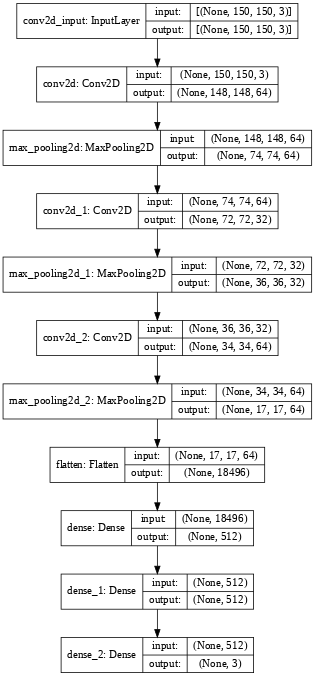

In [ ]:
model_visual = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_visual

## Penggunaan Callback

Pada submission ini digunakan fungsi callback agar mendapatkan nilai akurasi terbaik

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.97):
      print("\nAkurasi telah mencapai >97%!")
      self.model.stop_training = True
callbacks = myCallback()

# **Training Model**

Proses training menggunakan epoch atau iterasi sebanyak 50 dengan steps_per_epoch / batch size 25, dan validation_steps 5, lalu untuk memaksimalkan pencarian akurasi diterapkan callback.

In [ ]:
history = model.fit(train_generator, steps_per_epoch=25, epochs=50, #digunakan steps_per_epoch agar proses training data tidak terlalu lama
                              validation_data=validation_generator, 
                              validation_steps=5,
                              callbacks=[callbacks],
                               verbose=2)

Epoch 1/50
25/25 - 14s - loss: 1.1464 - accuracy: 0.2550 - val_loss: 1.0779 - val_accuracy: 0.3375
Epoch 2/50
25/25 - 13s - loss: 0.9889 - accuracy: 0.5400 - val_loss: 1.1411 - val_accuracy: 0.4750
Epoch 3/50
25/25 - 12s - loss: 0.7707 - accuracy: 0.6550 - val_loss: 0.4912 - val_accuracy: 0.8625
Epoch 4/50
25/25 - 12s - loss: 0.7026 - accuracy: 0.6900 - val_loss: 0.5442 - val_accuracy: 0.8000
Epoch 5/50
25/25 - 12s - loss: 0.4115 - accuracy: 0.8600 - val_loss: 0.4304 - val_accuracy: 0.8250
Epoch 6/50
25/25 - 12s - loss: 0.4417 - accuracy: 0.8450 - val_loss: 0.3483 - val_accuracy: 0.9125
Epoch 7/50
25/25 - 12s - loss: 0.2432 - accuracy: 0.9100 - val_loss: 0.3632 - val_accuracy: 0.8375
Epoch 8/50
25/25 - 12s - loss: 0.1833 - accuracy: 0.9400 - val_loss: 0.2052 - val_accuracy: 0.9250
Epoch 9/50
25/25 - 12s - loss: 0.3902 - accuracy: 0.8750 - val_loss: 0.3711 - val_accuracy: 0.8375
Epoch 10/50
25/25 - 12s - loss: 0.2627 - accuracy: 0.9072 - val_loss: 0.5591 - val_accuracy: 0.7875
Epoch 11/

**Dengan menggunakan fitur callback bisa mendapatkan akurasi lebih dari 96% pada epoch 21**

## Analisis Akurasi Model

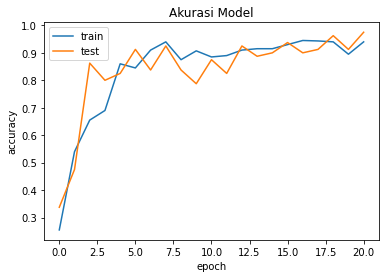

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Pada hasil analisis akurasi model terlihat kenaikan akurasi secara signifikan

## Analisis Loss Model

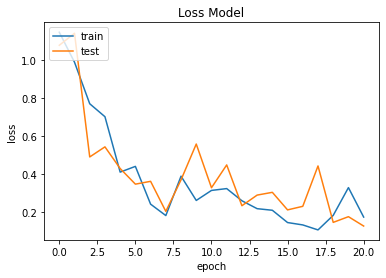

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Pada hasil diatas terlihat jika loss model mengalami penurunan dari epoch pertama sampai tercapai akurasi maksimalnya

# **Prediksi Gambar**

In [ ]:
# Definisikan Parameter yang akan digunakan
input_size = (150,150) # Size pada gambar
#define input shape
channel = (3) #channel yang digunakan 3 bytes warna
input_shape = input_size + channel
#define labels yang digunakan
labels = ['rock', 'scissors', 'paper']

Membuat fungsi preprocessing gambar dan reshape gambar

In [ ]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr
def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

Proses prediksi gambar

Saving tes.jfif to tes (1).jfif
rock 0.89171183


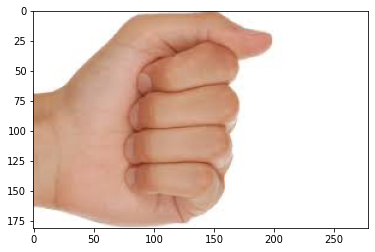

In [ ]:
uploaded = files.upload() #fungsi untuk bisa upload gambar
 
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path) #fungsi untuk load gambar
  imgplot = plt.imshow(img) #menampilkan gambar yang akan diprediksi
  x = preprocess(img, input_size) #dilakukannya preprocessing pada gambar dengan mengubah ke format yang bisa dilakukan prediksi
  x = reshape([x]) 

  classes = model.predict([x], batch_size=10) #prediksi gambar dengan membandingkan dengan model yang sudah dibuat
  
  print( labels[np.argmax(classes)], np.max(classes) ) # Menampilkan hasil prediksi dari gambar beserta persentasenya 

# **Kesimpulan**

Dengan menggunakan dataset rock_paper_scissors yang berjumlah 2188, validation set 40%, 3 convolution layer, 2 hidden layer, dengan epoch 21 maka didapatkan accuracy pada model sebesar 97,5% dan hasil prediksi gambar yang akurat.